# A basic look at Salary and Remote Working Status
### Based on Stack Overflow Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 5000)

df = pd.read_csv('./survey_results_public.csv')
df_schema = pd.read_csv('./survey_results_schema.csv')

df.head(3)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [2]:
def cleaning_function(df):
    '''
    INPUT: Raw dataframe from stack exchange
    
    OUTPUT: Dataframe cleaned in an appropriate manner for future
            analysis. Some data points might be excluded or columns
            transformed.
    '''
    df = df[(
        df.EmploymentStatus.ne('Not employed, and not looking for work')&
        df.EmploymentStatus.ne('Not employed, but looking for work')&
        df.EmploymentStatus.ne('Retired')&
        df.Country.eq('United States')
        )] # current analysis focused on us working population
    
    return df
    

In [3]:
df = cleaning_function(df)

### A look at salary distributions across different remote working status

In [4]:
(df[['Salary', 'HomeRemote']]
 .groupby('HomeRemote')
 .describe(percentiles=[.10,.25,.50,.75,.90])
 .astype(int))


Salary                 \
                                                    count    mean    std   
HomeRemote                                                                 
A few days each month                                 605   99326  33382   
About half the time                                    42  101372  29871   
All or almost all the time (I'm full-time remote)     178  110759  35183   
It's complicated                                       71   89920  37072   
Less than half the time, but at least one day e...    179  104876  34868   
More than half, but not all, the time                  31  107980  29769   
Never                                                 364   89111  34496   

                                                                         \
                                                      min    10%    25%   
HomeRemote                                                                
A few days each month                               21000  60000  75000   
About half the time                                 50000  62120  85000   
All or almost all the time (I'm full-time remote)     138  62625  90000   
It's complicated                                       92  45000  64000   
Less than half the time, but at least one day e...  30000  62400  80000   
More than half, but not all, the time               50000  80000  86500   
Never                                               17000  48000  63000   

                                                                            \
                                                       50%     75%     90%   
HomeRemote                                                                   
A few days each month                                95000  120000  146600   
About half the time                                  96000  120750  134500   
All or almost all the time (I'm full-time remote)   113750  130000  155000   
It's complicated                                     91500  120000  130000   
Less than half the time, but at least one day e...  100000  130000  150200   
More than half, but not all, the time               105000  120000  159120   
Never                                                84500  111675  139249   

                                                            
                                                       max  
HomeRemote                                                  
A few days each month                               192000  
About half the time                                 174000  
All or almost all the time (I'm full-time remote)   195000  
It's complicated                                    187500  
Less than half the time, but at least one day e...  185000  
More than half, but not all, the time               178000  
Never                                               195000

Interesting that salraies are highest by a substantial amount for remote workers and lowest for people who never work remotely across all quantiles and averages (by about 50% at every quantile)

In [5]:
(df[['Salary', 'HomeRemote']]
 .groupby('HomeRemote')
 .describe(percentiles=[.10,.25,.50,.75,.90])
 .astype(int)
 .loc[['Never', "All or almost all the time (I'm full-time remote)"]]
 .style.bar(color='#00C752'))

### A look at salary differences across pay scale for remote vs non remote workers

In [6]:
salary_df = pd.DataFrame()
for cats in enumerate(['Never',
                       "All or almost all the time (I'm full-time remote)", 
                       'A few days each month']):
    new_ent = (df[['Salary', 'HomeRemote']]
     .groupby('HomeRemote')
     .describe(percentiles=np.arange(0,1.1,.1).astype(list))
     .astype(int)
     .loc[['Never', 
           "All or almost all the time (I'm full-time remote)", 
           'A few days each month']]
     .iloc[:,4:15]
     .loc[cats[1]].reset_index(drop=True))
    salary_df = salary_df.append(new_ent)
salary_df = salary_df.T

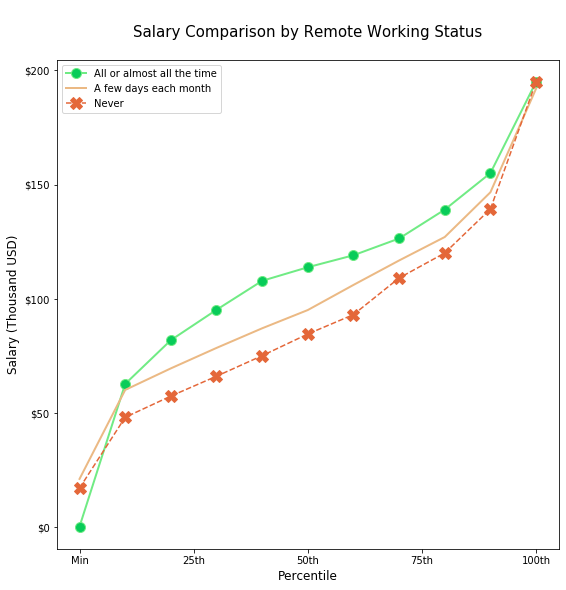

In [13]:
# Need to format more when getting ready to go into the blog post
# Maybe put some data labels for all the points or some select ones 
# in the beginning and middle.

plt.figure(figsize=(9, 9))
plt.plot(
    np.arange(0,1.1,.1), salary_df.columns[1], data=salary_df, 
    marker='o', markerfacecolor='#08CC59', markersize=10, 
    color='#70EB84', linewidth=2, label='All or almost all the time')
plt.plot(
    np.arange(0,1.1,.1), salary_df.columns[2], data=salary_df, 
    marker='', color='#EBB984', linewidth=2)
plt.plot(
    np.arange(0,1.1,.1), salary_df.columns[0], data=salary_df, 
    marker='X', markersize=12, color='#E46739', linewidth=1.5, 
    linestyle='dashed')
plt.title(
    '\nSalary Comparison by Remote Working Status\n', 
    fontsize=15)
plt.xlabel('Percentile', fontsize=12)
plt.ylabel('Salary (Thousand USD)', fontsize=12)
plt.yticks([0,50000,100000,150000,200000], 
           ['$0', '$50', '$100', '$150', '$200'])
plt.xticks([0,.25,.5,.75,1], 
           ['Min', '25th', '50th', '75th', '100th'])
plt.legend();


The median range of salaries looks to have the largest spread in wage increases for those workers who work remotely.